## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [20]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

1. Yes this is a normal distribution as we can see from the plot below with a mean of 98.25 and std dev of 0.73

2. The population mean is between (98.25 + SE) and (98.25 - SE). The SE as estimated below is 0.064 which gives the population mean between 98.314 and 98.186. Here the z-test is more appropriate because the sample size > 30. 

3. If we take a z-score of 3 (99.7 values within the three standard deviations in the normal distribution), the Confidence intervals are (98.25 - 3*0.73)  and (98.25 + 3*0.73) which is 96.06 and 100.33. The temperatures beyond these temperatures are tagged as 'abnormal'. 

4. There is no significant difference between the male and female temperatures from the two sample hypothesis t-test of the sample means for males and females with the p-values > 0.05  (critical significance value). 

In [4]:
df = pd.read_csv('data/human_body_temperature.csv')

In [17]:
print(len(df))

df.mean()

130


temperature    98.249231
heart_rate     73.761538
dtype: float64

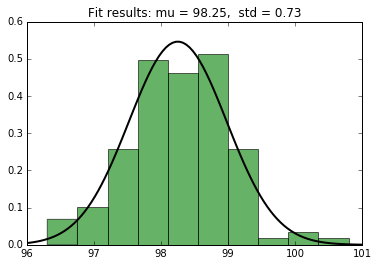

In [14]:
mu, std = norm.fit(df['temperature'])

plt.hist(df['temperature'], normed=True, alpha=0.6, color='g')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [22]:
#standard error of mean
SE = 0.73/math.sqrt(len(df))
print('Standard Error', SE)

Standard Error 0.06402523540941313


In [23]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [24]:
df_male = df[df['gender'] == 'M']
df_female = df[df['gender'] == 'F']

print(len(df_male))
print(len(df_female))

65
65


In [26]:
print(df_male.mean())
print(df_female.mean())

print(df_male.std())
print(df_female.std())


temperature    98.104615
heart_rate     73.369231
dtype: float64
temperature    98.393846
heart_rate     74.153846
dtype: float64
temperature    0.698756
heart_rate     5.875184
dtype: float64
temperature    0.743488
heart_rate     8.105227
dtype: float64
